In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import *

In [3]:
%matplotlib notebook

In [4]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200525/Bead2/Discharge/Discharge0526/', file_prefix='Discharge')

338  files in folder
338  files loaded


In [5]:
file_i = np.array([int(bb.fname.split('_')[-1].split('.')[0]) for bb in bdf_discharge])

In [6]:
amps, phases = build_z_response_discharge(bdf_discharge, drive_freq=71)

<IPython.core.display.Javascript object>


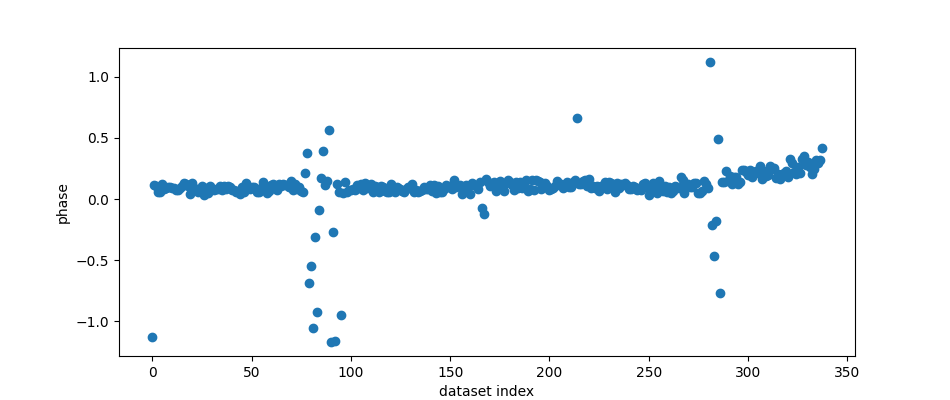

mean phase:  0.09524659745198485


In [7]:
##quick look at the phase
_,ax = plt.subplots(figsize=(9.5, 4))
ax.scatter(file_i, phases)
ax.set(xlabel='dataset index', ylabel='phase')
mean_phase = np.mean(phases[100:200])
print('mean phase: ', mean_phase) ## this is the phase I set late for the response

In [8]:
## fit with fixed phase
## bimodal feature is not implemented
## (can be implemented in case it is needed)
amps_fixed_phase, _ = build_z_response_discharge(bdf_discharge, drive_freq=71, phase=mean_phase, fix_phase=True)

<IPython.core.display.Javascript object>


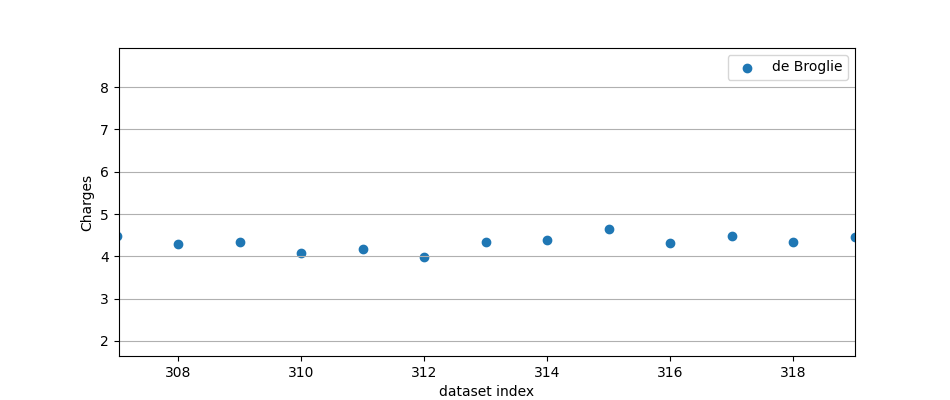

In [9]:
_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85 ## Wilson scale
extra_scale = 0.95

ax.scatter(file_i, amps_fixed_phase/scale/extra_scale, label='de Broglie')

ax.legend()
ax.set(xlabel='dataset index', xlim=(3,319), ylabel='Charges', ylim=(None,None))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))